In [30]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [31]:
def generalization(conditioning, p=True):
    c_color = random.randrange(430, 771)
    s_color = random.randrange(430, 771)
    delta = abs(c_color - s_color)
    redundance_test = None
    
    if p:
        print('\n'.join((
            f"Conditioning color is {c_color} nm",
            f"Conditioning intensity is {conditioning}",
            f"Stimulus color is {s_color} nm.",
            f"∆ (difference between colors) is {delta} nm.")
        ))

    if delta <= 40:
        redundance_test = (40 - delta)/40
        response = (conditioning * redundance_test) ** 2
        if p:
            print("\n".join((f"Redundance test is {redundance_test}",
                         f"Response is {response}.\n")))
        return delta, conditioning, response
    else:
        response = 0
        if p:
            print("Response is null.\n")
        return delta, conditioning, response

print(generalization(1.0, p=True))
print(generalization(1.25, p=True))
print(generalization(1.5, p=True))

Conditioning color is 462 nm
Conditioning intensity is 1.0
Stimulus color is 438 nm.
∆ (difference between colors) is 24 nm.
Redundance test is 0.4
Response is 0.16000000000000003.

(24, 1.0, 0.16000000000000003)
Conditioning color is 737 nm
Conditioning intensity is 1.25
Stimulus color is 753 nm.
∆ (difference between colors) is 16 nm.
Redundance test is 0.6
Response is 0.5625.

(16, 1.25, 0.5625)
Conditioning color is 439 nm
Conditioning intensity is 1.5
Stimulus color is 564 nm.
∆ (difference between colors) is 125 nm.
Response is null.

(125, 1.5, 0)


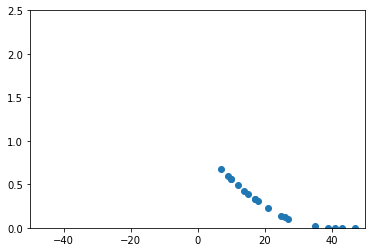

In [48]:
distribution = []

for n in range(100):
    distribution.append(generalization(1.0, p=False))

deltas, response = [i[0] for i in distribution], [i[2] for i in distribution]
plt.xlim(-50.0, 50)
plt.ylim(0.0, 2.5)
plt.scatter(x=deltas, y=response)
plt.show()

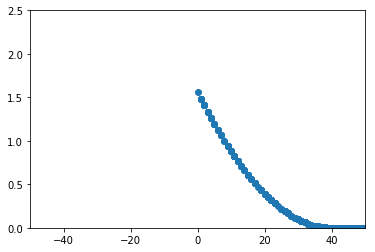

N = 0.7069936899038461
sig = 0.40636153463274444


In [46]:
distribution = []

for n in range(1000):
    distribution.append(generalization(1.25, p=False))


deltas, response = [i[0] for i in distribution], [i[2] for i in distribution]
plt.xlim(-50.0, 50)
plt.ylim(0.0, 2.5)
plt.scatter(x=deltas, y=response)
plt.show()

gauss_resp = [i for i in response if i > 0.1]

print(f"N = {np.mean(gauss_resp)}")
print(f"sig = {np.std(gauss_resp)}")

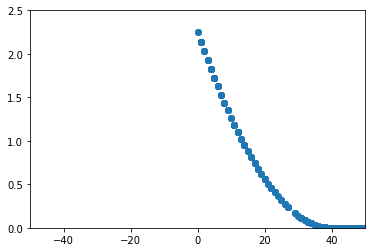

N = 1.0363113496932514
sig = 0.6126287913326695


In [45]:
distribution = []

for n in range(1000):
    distribution.append(generalization(1.5, p=False))


deltas, response = [i[0] for i in distribution], [i[2] for i in distribution]
plt.xlim(-50.0, 50)
plt.ylim(0.0, 2.5)
plt.scatter(x=deltas, y=response)
plt.show()

gauss_resp = [i for i in response if i > 0.1]

print(f"N = {np.mean(gauss_resp)}")
print(f"sig = {np.std(gauss_resp)}")

In [43]:
def gauss_values(distribution):
    deltas, response = [i[0] for i in distribution], [i[2] for i in distribution]
    gauss_resp = [i for i in response if i > 0.1]
    print(f"N = {np.mean(gauss_resp)}")
    print(f"sig = {np.std(gauss_resp)}\n")
    return np.mean(gauss_resp), np.std(gauss_resp)

In [44]:
d1, d2, d3 = [], [], []
for n in range(1000):
    d1.append(generalization(1.0, p=False))
    d2.append(generalization(1.25, p=False))
    d3.append(generalization(1.5, p=False))

for d in (d1, d2, d3):
    gauss_values(d)

N = 0.44157271241830065
sig = 0.25251116369159726

N = 0.7147812954215116
sig = 0.43987398275872136

N = 0.9974274861878454
sig = 0.6312062022637908



In [22]:
def make_gauss(N, sig, mu):
    return lambda x: N/(sig * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sig**2))